## Problem statement:

**Predicting Survival in the Titanic Data Set**

We will be using a decision tree to make predictions about the Titanic dataset from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not. 


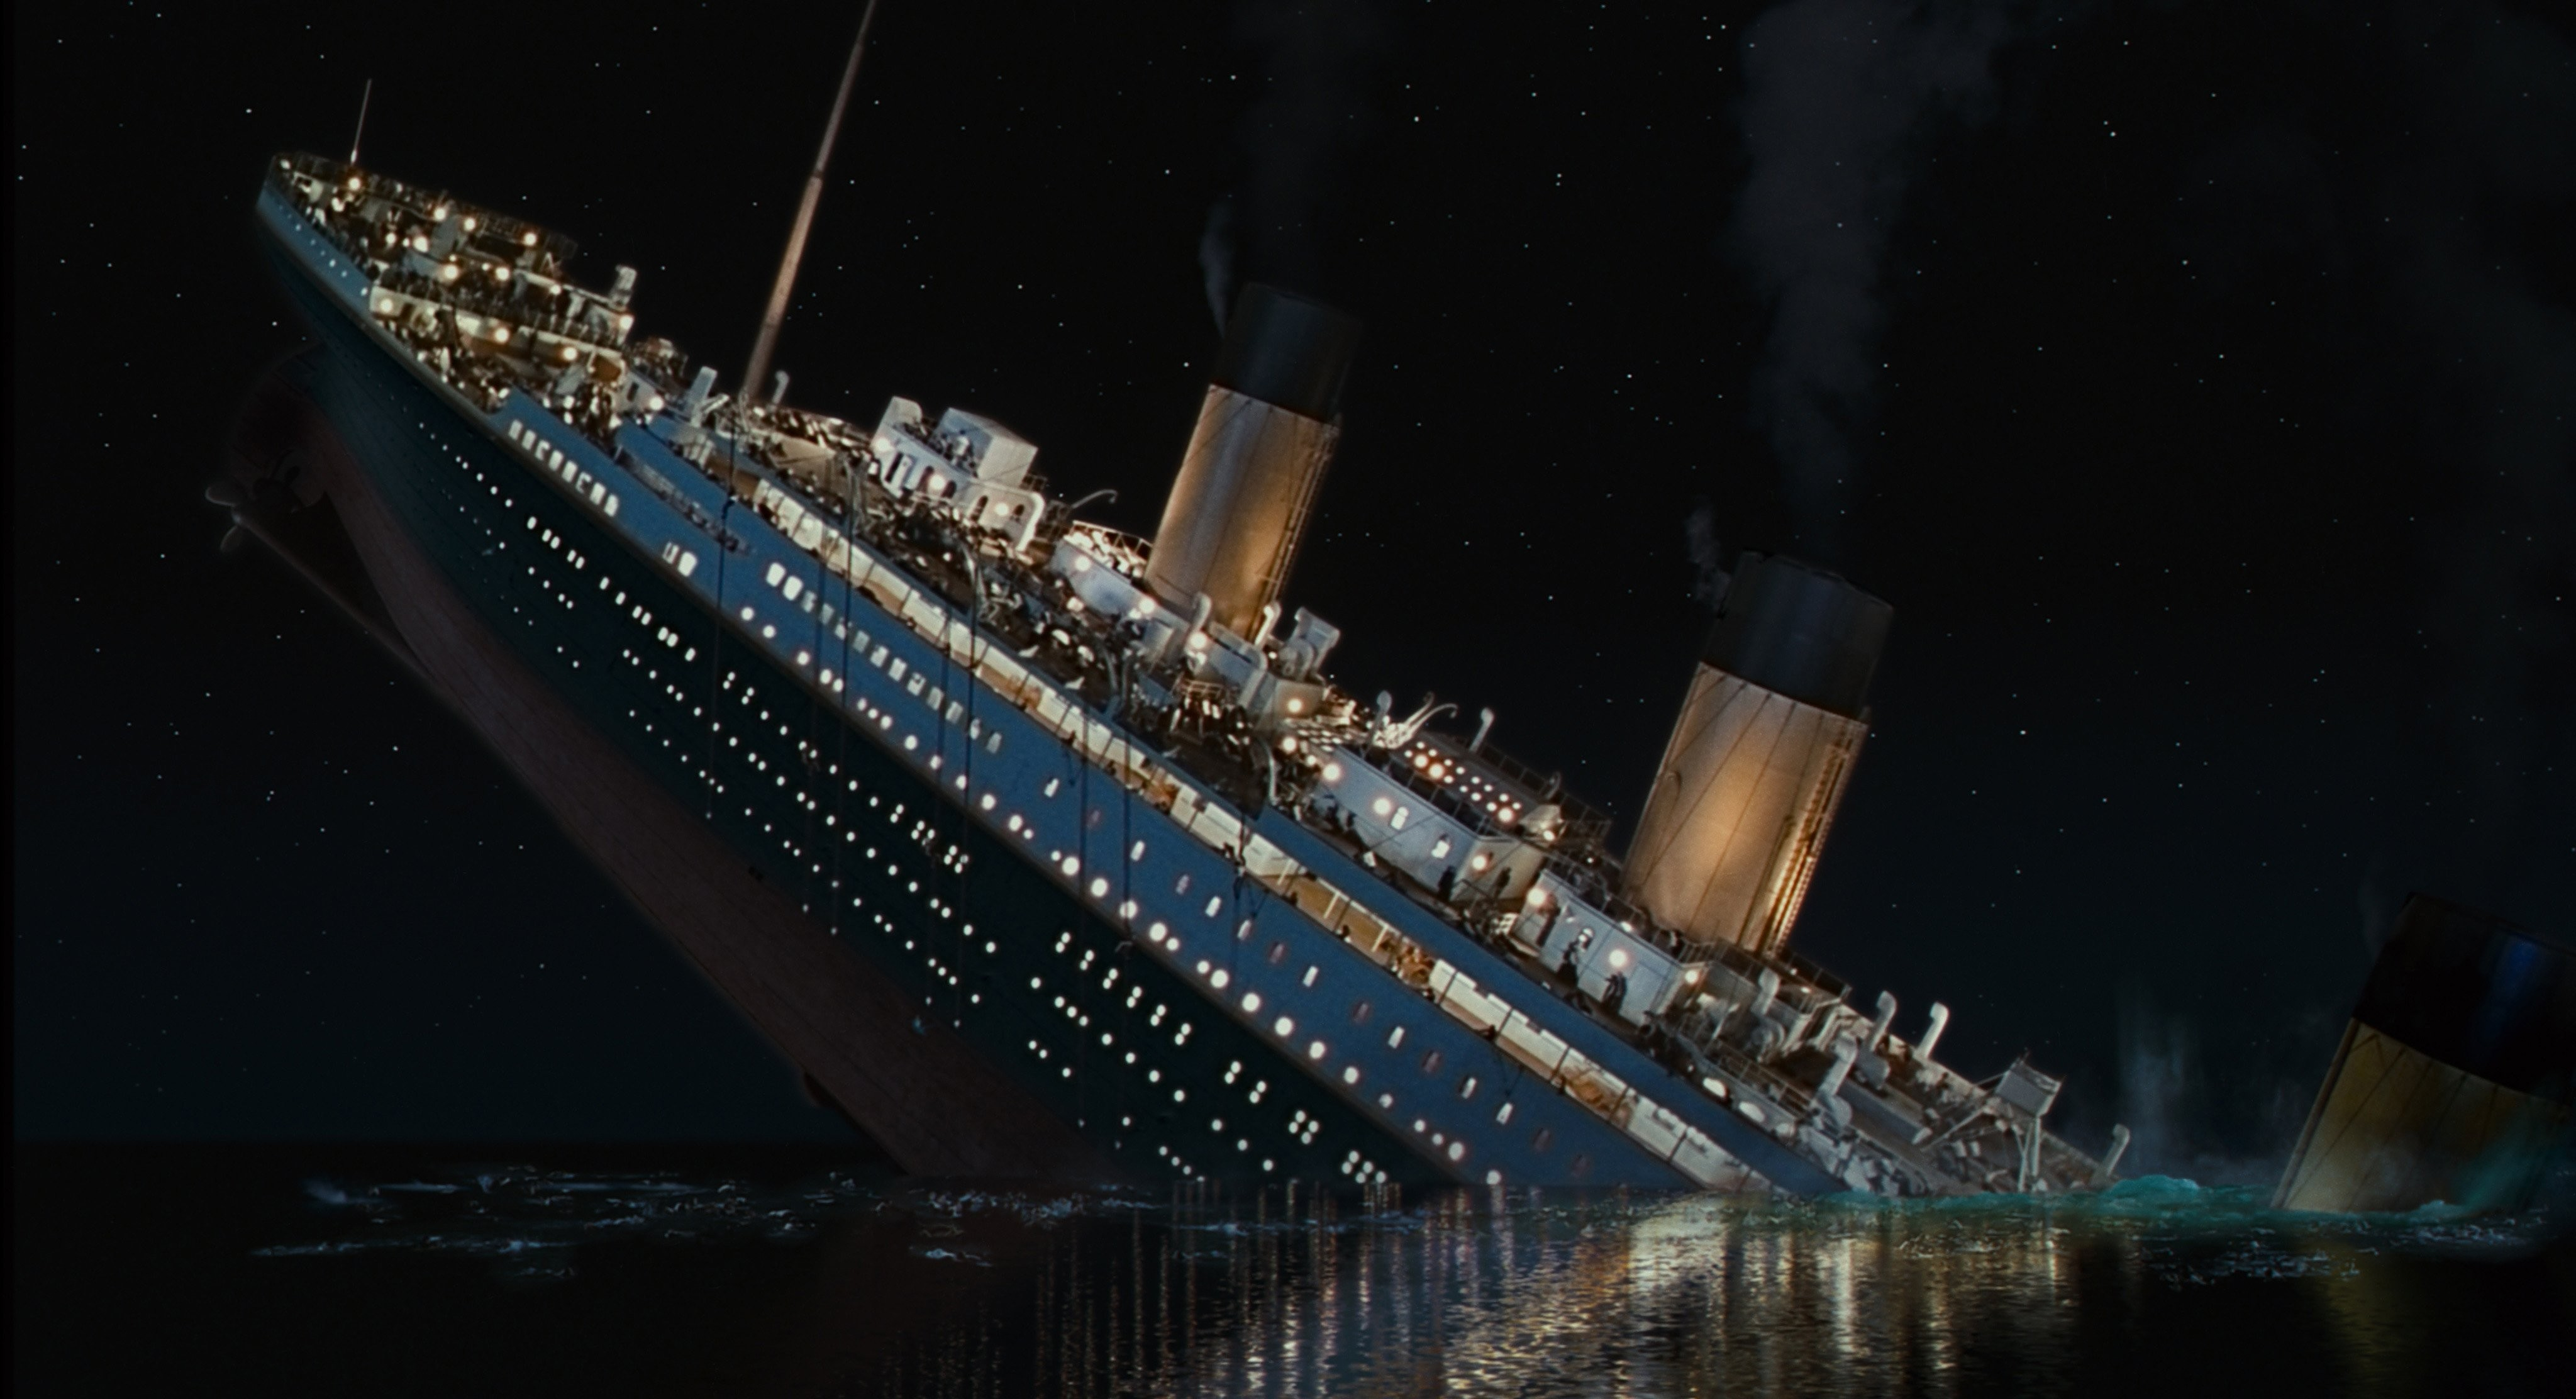

In [1573]:
#Reference: Images from google
#https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.bustle.com%2Farticles%2F71418-you-can-relive-the-titanic-sinking-in-real-time-in-new-video-game-which-is-definitely&psig=AOvVaw1QMvLswEU6tJDktolh8qQc&ust=1598639186312000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCID6nr-BvOsCFQAAAAAdAAAAABAW
from IPython.display import Image
Image("images/titanic_1.jpg")

In [1574]:
# Loading Data and Modules
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mpl

import sklearn 
from pandas import Series, DataFrame
from pylab import rcParams

import pydotplus
from IPython.display import Image, display
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report, plot_confusion_matrix


from cycler import cycler
plt.style.use('ggplot')
data = np.random.randn(50)

# figure size in inches
rcParams['figure.figsize'] = 15,6
sb.set()
%matplotlib inline

In [1575]:
#Let import and display our dataset
titanic = pd.read_csv('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')
titanic.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [1576]:
## Data Analysis - Print out unique values
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1577]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1578]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1579]:
## Let consider Bar chart for Categorical Features.
def bar_chart(feature):
    survived = titanic[titanic['Survived']==1][feature].value_counts()
    dead = titanic[titanic['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

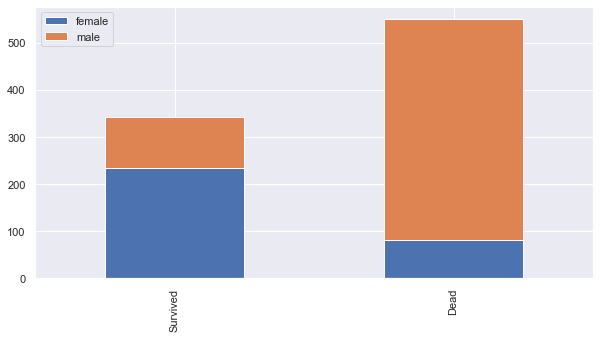

In [1580]:
    bar_chart('Sex')

💥The chart shows **Women** survived than **Men**.

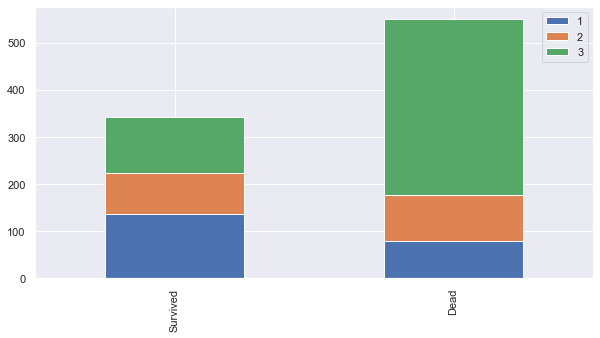

In [1581]:
bar_chart('Pclass')

💥The chart shows that 1st class more survived than other classes. And the 3rd class shows more death cases than others.

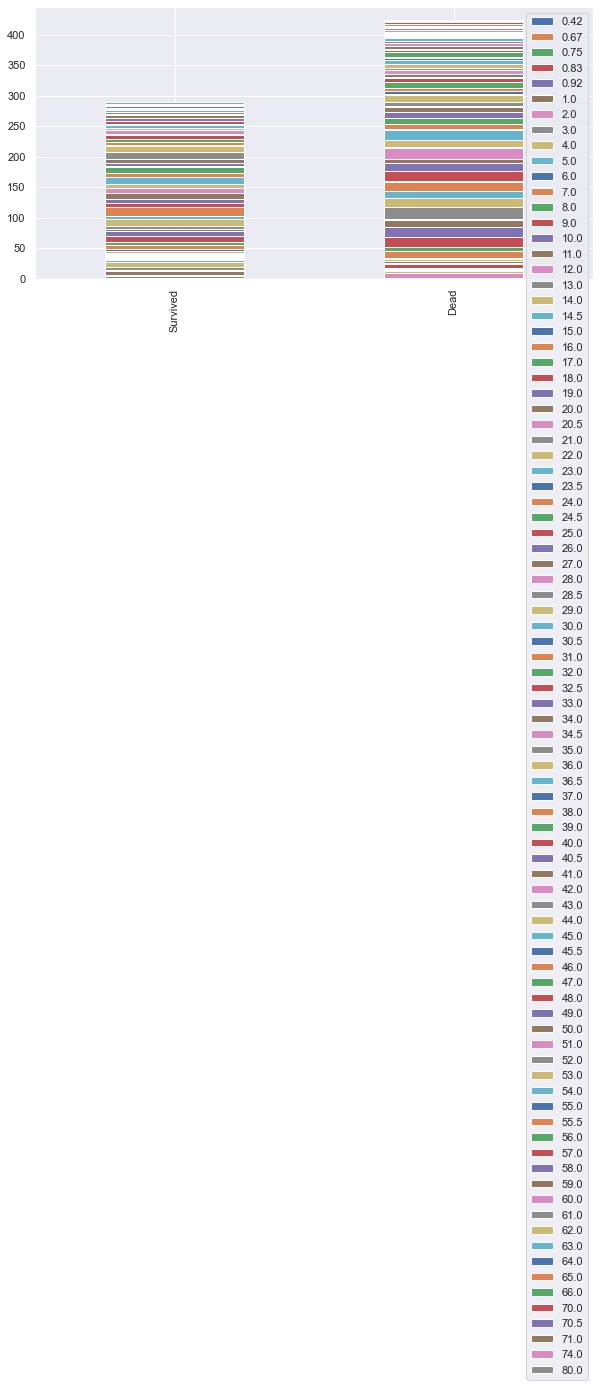

In [1582]:
bar_chart('Age')

In [1583]:
titanic_data = [titanic]
for dataset in titanic_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=True)

In [1584]:
titanic['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Ms            1
Lady          1
Capt          1
Jonkheer      1
Mme           1
Sir           1
Don           1
Countess      1
Name: Title, dtype: int64

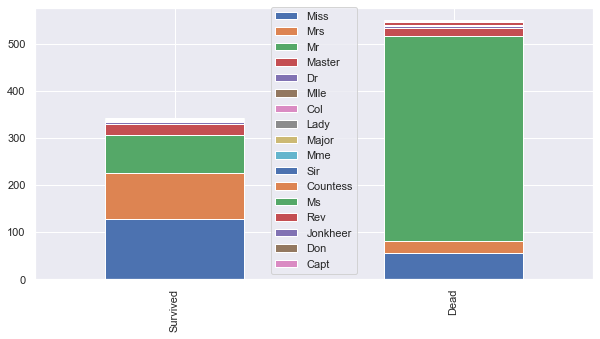

In [1585]:
bar_chart('Title')

**Let proceed to feature engineering step. By filling out the missing data**🤷‍♂️

In [1586]:
#Let proceed to feature engineering step.By filling out the missing (Age) data
titanic["Age"].fillna(titanic.groupby("Title")["Age"].transform("median"), inplace=True)

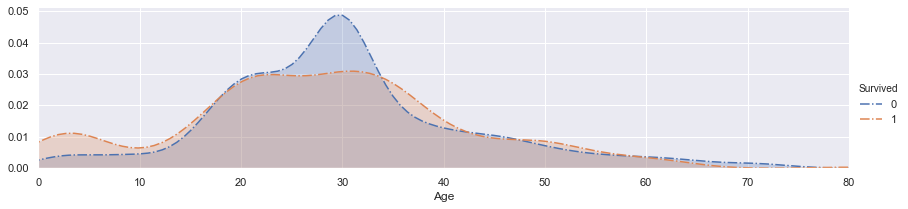

In [1587]:
facet_Age = sb.FacetGrid(titanic, hue="Survived", aspect=4)
facet_Age.map(sb.kdeplot, 'Age', shade=True)
facet_Age.set(xlim=(0, titanic['Age'].max()))
facet_Age.add_legend()

plt.show()

In [1588]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [1589]:
#Let convert Numerical Age to Categorical variable
# Let Asssign : Senior(4), Mid-age(3), Adult(2), Young(1), Child(0).
Titanic = [titanic] # Converting the Age dataframe into list
for dataset in Titanic:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [1590]:
titanic.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,2.0,0,0,374910,8.0500,NaN,S,Mr
96,97,0,1,"Goldschmidt, Mr. George B",male,4.0,0,0,PC 17754,34.6542,A5,C,Mr
97,98,1,1,"Greenfield, Mr. William Bertram",male,1.0,0,1,PC 17759,63.3583,D10 D12,C,Mr
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,2.0,0,1,231919,23.0000,NaN,S,Mrs


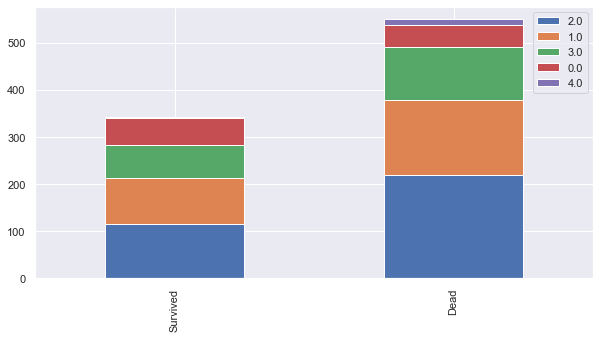

In [1591]:
bar_chart('Age')

In [1592]:
#Let convert Numerical Cabin to Categorical variable
titanic.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
D              3
E101           3
              ..
E49            1
D56            1
D49            1
B37            1
A20            1
Name: Cabin, Length: 147, dtype: int64

In [1593]:
Titanic = [titanic] # Converting the CABIN dataframe into list
for dataset in Titanic:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<AxesSubplot:>

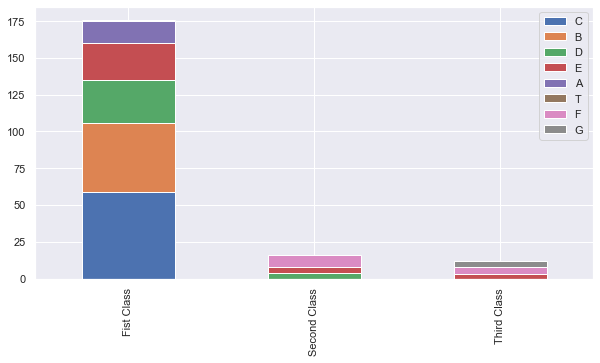

In [1594]:
Pclass1 = titanic[titanic['Pclass']==1]['Cabin'].value_counts()
Pclass2 = titanic[titanic['Pclass']==2]['Cabin'].value_counts()
Pclass3 = titanic[titanic['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['Fist Class','Second Class', 'Third Class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [1595]:
#Let find if there is any family!
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"] + 1

(0.0, 12.258947067542628)

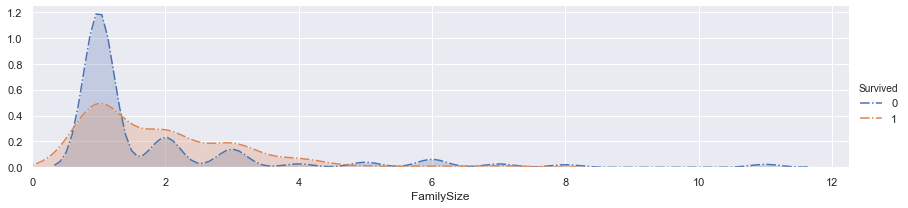

In [1596]:
facet = sb.FacetGrid(titanic, hue="Survived", aspect=4)
facet.map(sb.kdeplot, 'FamilySize', shade= True)
facet.add_legend()
plt.xlim(0)

In [1597]:
Fmapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in titanic_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(Fmapping)

In [1598]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C,C,Mrs,0.4
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C,S,Mrs,0.4
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,NaN,S,Mr,0.0


In [1599]:
# Let Scale the Feature
Cmapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F":2.4, "G": 2.4, "T": 2.8}
for dataset in Titanic:
    dataset['Cabin'] = dataset['Cabin'].map(Cmapping)

In [1600]:
#Fill missing fare
titanic["Cabin"].fillna(titanic.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [1601]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,2.4,S,Mr,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,0.8,C,Mrs,0.4
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,2.4,S,Miss,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,0.8,S,Mrs,0.4
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,2.4,S,Mr,0.0


In [1602]:
# Let drop some few columns
features_drop = ['Ticket', 'SibSp', 'Parch']
titanic = titanic.drop(features_drop, axis=1)
titanic = titanic.drop(['PassengerId'], axis=1)

In [1603]:
# Dataset shape, size and target
titanic_data = titanic.drop('Survived', axis=1)
target = titanic['Survived']

titanic.shape, target.shape, titanic.size

((891, 10), (891,), 8910)

In [1604]:
print("Null Error Rate:", format(titanic['Survived'].mean() * 100, '.2f'), '%')

Null Error Rate: 38.38 %


In [1605]:
# Let display our new dataset
titanic.head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,1.0,7.2500,2.4,S,Mr,0.4
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,71.2833,0.8,C,Mrs,0.4
2,1,3,"Heikkinen, Miss. Laina",female,1.0,7.9250,2.4,S,Miss,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,53.1000,0.8,S,Mrs,0.4
4,0,3,"Allen, Mr. William Henry",male,2.0,8.0500,2.4,S,Mr,0.0


**Modelling our Dataset**✨

In [1606]:
titanic['Sex'] = titanic['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [1607]:
# The columns that we will be making predictions with
X = titanic[['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize']]
#The column that we will be making predictions on
y = titanic['Survived']

In [1608]:
### Split data randomly into 70% training and 30% test ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=355)
# Without any preprocessing, let visualize the tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7649253731343284

In [1609]:
test = {
 'max_depth': range(2, 10),   
 'min_samples_split': [3, 5, 7, 10],
 'min_samples_leaf': [3, 5, 7, 10]
}
score = GridSearchCV(DecisionTreeClassifier(), param_grid=test, cv=k_fold, n_jobs=-1, verbose=1, scoring=scoring)
score.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:    4.3s


Best: 0.810625 using {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 3}


[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:    4.5s finished


In [1610]:
print("Accuracy for titanic dataset:\n")
predicted = score.predict(X_test)
print (format(metrics.accuracy_score(y_test, predicted) * 100,'.2f'), '%.')

Accuracy for titanic dataset:

78.36 %.


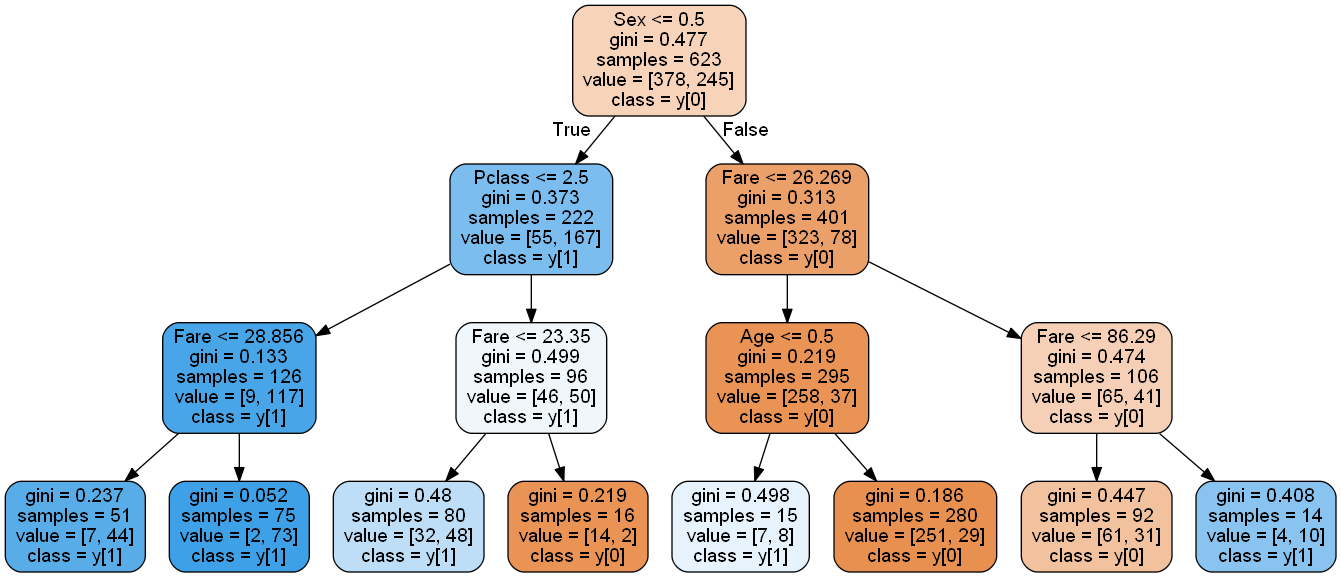

In [1611]:
# Decision Tree based on the estimator.
dot_data = tree.export_graphviz(grid_result.best_estimator_, out_file=None, filled=True, rounded=True, feature_names=['Pclass', 'Sex', 'Age', 'Fare'],class_names=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))

In [1612]:
acc_decision_tree = round(score.score(X_train, y_train) * 100, 2)
acc_decision_tree

85.87

#### We finally can show our Decision Tree which has an accuracy of 85.87% across the training dataset. 